Task 1 - EDA of financial data. Specifically - Yahoo Finance dataset has been used.

1. Import dependencies, allocate initial data

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import mplfinance as mpf
from matplotlib import pyplot as plt

import datetime

from setup import get_task_data
from consts import TASK_1_FINANCE_COLS

In [48]:
TASK_DATA_NAME = 'AMD.csv'

In [49]:
df = pd.read_csv(get_task_data(TASK_DATA_NAME))
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
7290,2009-02-05,2.2600,2.440000,2.210000,2.360000,2.360000,17011600
521,1982-04-08,0.0000,4.062500,3.875000,4.000000,4.000000,1032600
2624,1990-08-02,3.3125,3.375000,3.125000,3.187500,3.187500,1540200
304,1981-06-01,0.0000,4.958333,4.666667,4.666667,4.666667,356400
4507,1998-01-13,9.0000,10.437500,8.968750,10.437500,10.437500,4973400


2. Exploring & Cleaning dataset

In [50]:
df.shape

(10983, 7)

In [51]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10983.000000,10983.000000,10983.000000,10983.000000,10983.000000,1.098300e+04
mean,17.363170,18.039162,17.270706,17.657255,17.657255,1.870413e+07
std,24.249227,24.556666,23.533232,24.052066,24.052066,2.829291e+07
min,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,5.000000,5.458333,5.187500,5.312500,5.312500,1.238700e+06
50%,9.937500,10.125000,9.718750,9.937500,9.937500,6.926800e+06
75%,16.250000,16.562500,15.937500,16.230000,16.230000,2.327280e+07
max,163.279999,164.460007,156.100006,161.910004,161.910004,3.250584e+08


In [52]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10983 entries, 0 to 10982
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10983 non-null  datetime64[ns]
 1   Open       10983 non-null  float64       
 2   High       10983 non-null  float64       
 3   Low        10983 non-null  float64       
 4   Close      10983 non-null  float64       
 5   Adj Close  10983 non-null  float64       
 6   Volume     10983 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 600.8 KB


In [53]:
print(f'Duplicated rows - {df.duplicated().sum()}')

Duplicated rows - 0


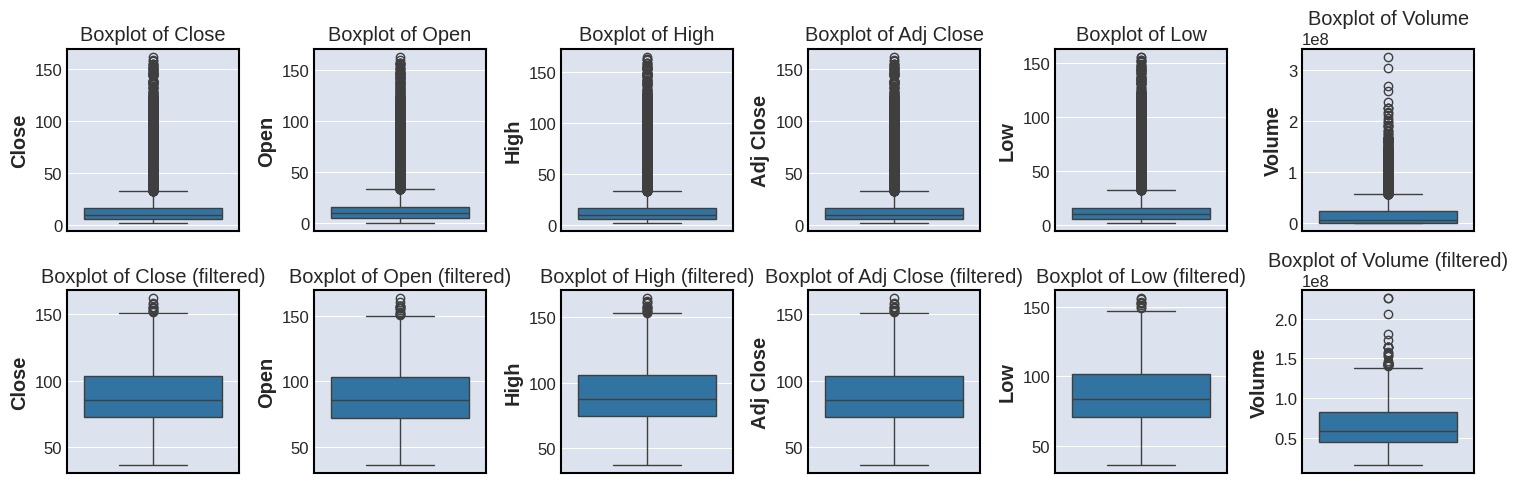

In [54]:
fig, axes = plt.subplots(2, len(TASK_1_FINANCE_COLS), figsize=(15, 5))
for index, col in enumerate(TASK_1_FINANCE_COLS):
    sns.boxplot(df[col], ax=axes[0, index])
    axes[0, index].set_title(f'Boxplot of {col}')
    sns.boxplot(df.loc[df.index>10000][col], ax=axes[1, index])
    axes[1, index].set_title(f'Boxplot of {col} (filtered)')
plt.tight_layout()
plt.show()

As we can see, data does not have significant outliers, although before 2010s, scale of trade parameters was much smaller, leading to making minority of recent data much more different from the majority of older data. No transformations or cleansing were needed, so we're not saving dataframe.

3. Visualizations

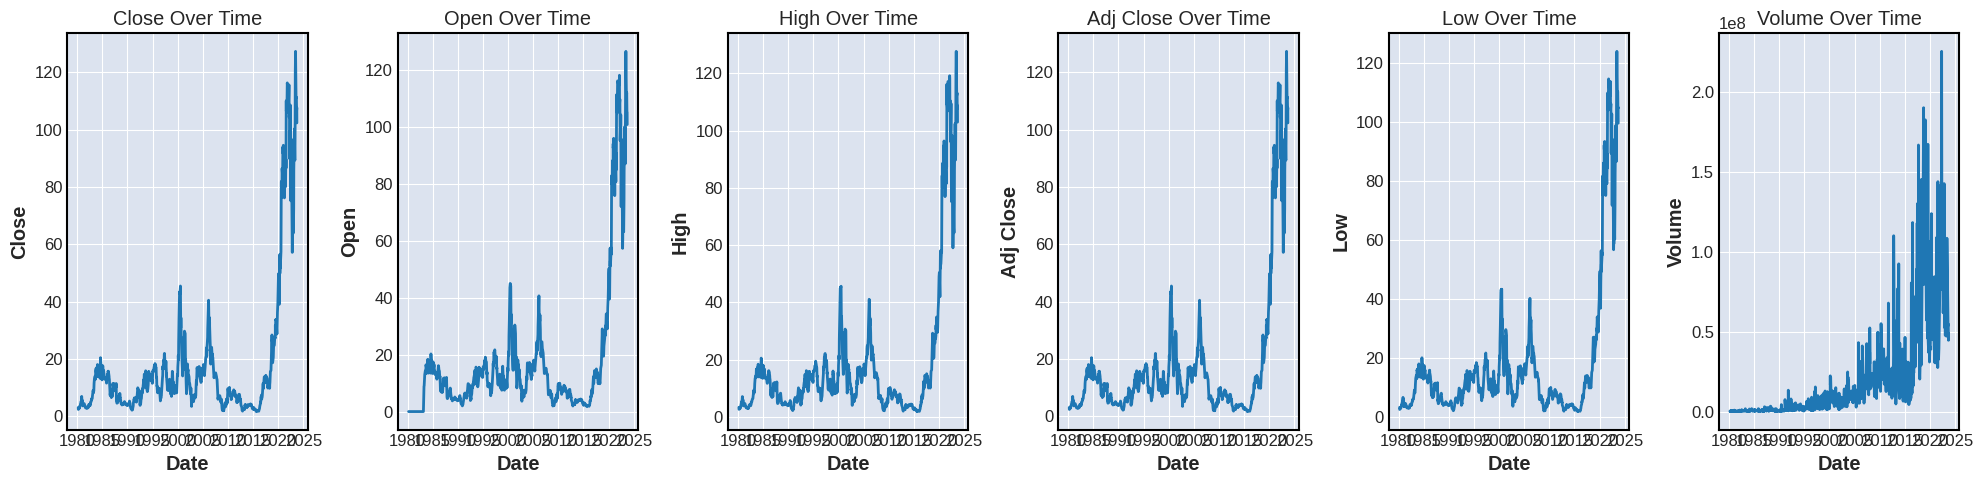

In [55]:
df_sampled = df.sample(1000).sort_index()

fig, axes = plt.subplots(1, len(TASK_1_FINANCE_COLS), figsize=(20, 5))
for index, col in enumerate(TASK_1_FINANCE_COLS):
    ax = axes[index] 
    ax.plot(df_sampled['Date'], df_sampled[col])
    ax.set_xlabel('Date')
    ax.set_ylabel(col) 
    ax.set_title(f'{col} Over Time')
plt.tight_layout()
plt.show()

As we can see, all financial parameters are indeed drastically increasing over time, from 1980s to 2020s.

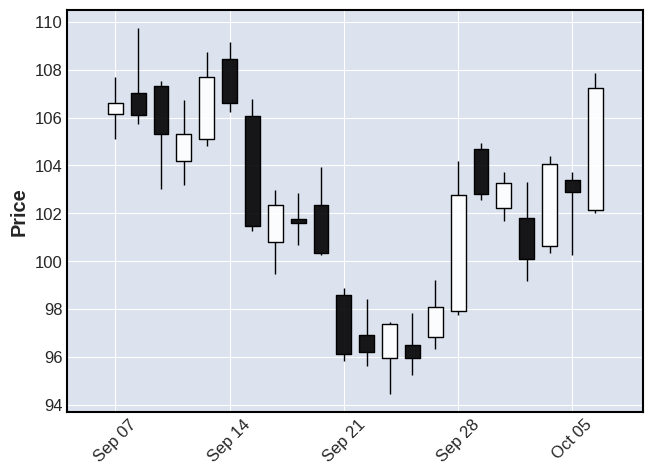

In [58]:
month_ago = (datetime.datetime.now() - datetime.timedelta(days=31)).date()
df_newest_data = df[df['Date'].dt.date>=month_ago].set_index('Date')
mpf.plot(df_newest_data, type='candle')
plt.show()

Analyzing candle chart, we can say that in the middle of September, 2023, there was a relatively big fall in Yahoo Finance.

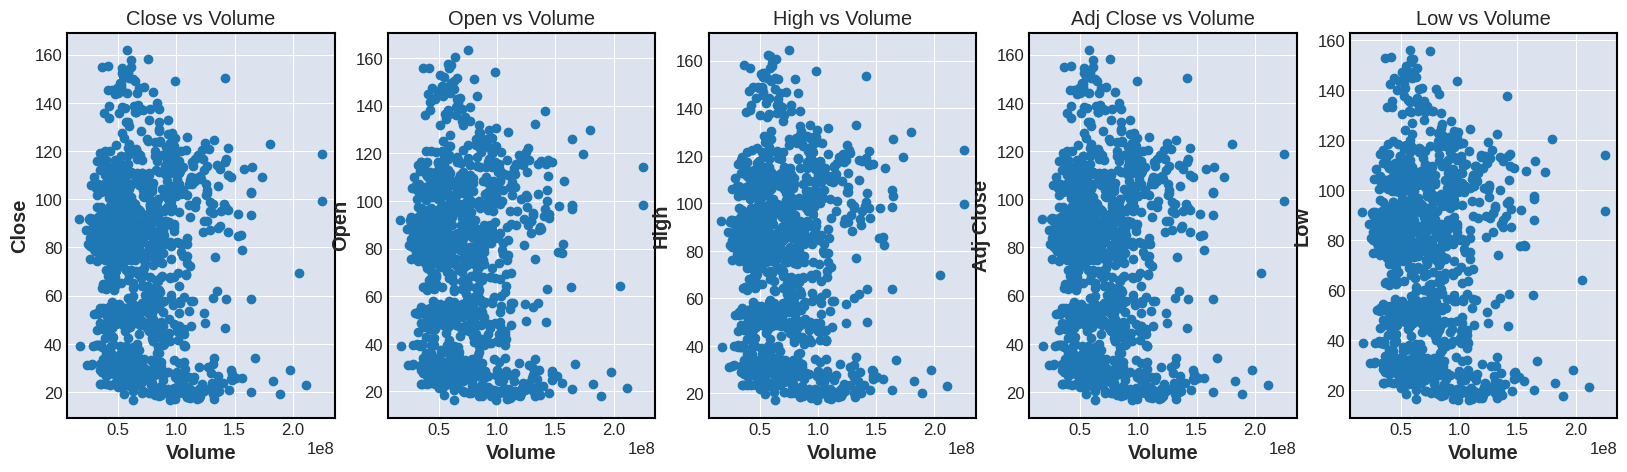

In [69]:
five_years_ago = (datetime.datetime.now() - datetime.timedelta(days=365*5)).date()
df_scatter = df[df['Date'].dt.date>=five_years_ago]
finance_cols_scatter = [col for col in TASK_1_FINANCE_COLS if col != 'Volume']
fig, axes = plt.subplots(1, len(finance_cols_scatter), figsize=(20, 5))
for index, col in enumerate(finance_cols_scatter):
    ax = axes[index] 
    ax.scatter(df_scatter['Volume'], df_scatter[col])
    ax.set_xlabel('Volume')
    ax.set_ylabel(col) 
    ax.set_title(f'{col} vs Volume')

plt.show()

As a result of visualization section, we can say that scatter plots, line charts and candle charts are extremely helpful in analyzing financial data.

4. Technical indicators evaluation

In [70]:
df['Moving Average'] = df['Close'].rolling(window=20).mean()
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     1980-03-17    0.000000    3.302083    3.125000    3.145833    3.145833   
1     1980-03-18    0.000000    3.125000    2.937500    3.031250    3.031250   
2     1980-03-19    0.000000    3.083333    3.020833    3.041667    3.041667   
3     1980-03-20    0.000000    3.062500    3.010417    3.010417    3.010417   
4     1980-03-21    0.000000    3.020833    2.906250    2.916667    2.916667   
...          ...         ...         ...         ...         ...         ...   
10978 2023-10-02  102.209999  103.709999  101.699997  103.269997  103.269997   
10979 2023-10-03  101.800003  103.290001   99.169998  100.080002  100.080002   
10980 2023-10-04  100.650002  104.400002  100.339996  104.070000  104.070000   
10981 2023-10-05  103.410004  103.739998  100.269997  102.910004  102.910004   
10982 2023-10-06  102.160004  107.870003  102.029999  107.239998  107.239998   

         Volume  Moving Average  
0    

In [71]:
delta = df['Close'].diff()

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=20).mean()
avg_loss = loss.rolling(window=20).mean()

rs = avg_gain / avg_loss

df['RSI'] = 100 - (100 / (1 + rs))
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     1980-03-17    0.000000    3.302083    3.125000    3.145833    3.145833   
1     1980-03-18    0.000000    3.125000    2.937500    3.031250    3.031250   
2     1980-03-19    0.000000    3.083333    3.020833    3.041667    3.041667   
3     1980-03-20    0.000000    3.062500    3.010417    3.010417    3.010417   
4     1980-03-21    0.000000    3.020833    2.906250    2.916667    2.916667   
...          ...         ...         ...         ...         ...         ...   
10978 2023-10-02  102.209999  103.709999  101.699997  103.269997  103.269997   
10979 2023-10-03  101.800003  103.290001   99.169998  100.080002  100.080002   
10980 2023-10-04  100.650002  104.400002  100.339996  104.070000  104.070000   
10981 2023-10-05  103.410004  103.739998  100.269997  102.910004  102.910004   
10982 2023-10-06  102.160004  107.870003  102.029999  107.239998  107.239998   

         Volume  Moving Average        

In [73]:
df['STD'] = df['Close'].rolling(window=20).std()
# Calculate the upper and lower bands
df['Upper'] = df['Moving Average'] + (2 * df['STD'])
df['Lower'] = df['Moving Average'] - (2 * df['STD'])
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     1980-03-17    0.000000    3.302083    3.125000    3.145833    3.145833   
1     1980-03-18    0.000000    3.125000    2.937500    3.031250    3.031250   
2     1980-03-19    0.000000    3.083333    3.020833    3.041667    3.041667   
3     1980-03-20    0.000000    3.062500    3.010417    3.010417    3.010417   
4     1980-03-21    0.000000    3.020833    2.906250    2.916667    2.916667   
...          ...         ...         ...         ...         ...         ...   
10978 2023-10-02  102.209999  103.709999  101.699997  103.269997  103.269997   
10979 2023-10-03  101.800003  103.290001   99.169998  100.080002  100.080002   
10980 2023-10-04  100.650002  104.400002  100.339996  104.070000  104.070000   
10981 2023-10-05  103.410004  103.739998  100.269997  102.910004  102.910004   
10982 2023-10-06  102.160004  107.870003  102.029999  107.239998  107.239998   

         Volume  Moving Average        

5. Data Analysis

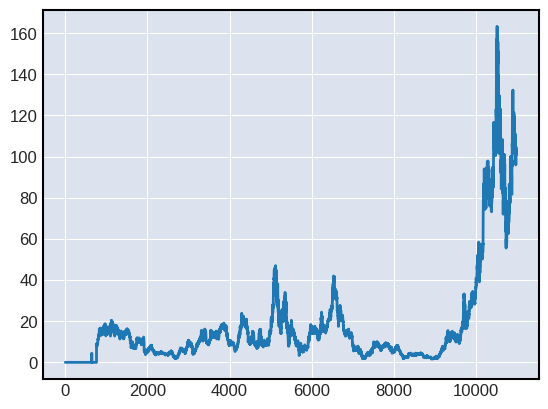

In [75]:
left_shoulder = df['Close'].iloc[0:10].max()
head = df['Close'].iloc[10:20].max()
right_shoulder = df['Close'].iloc[20:30].max()
plt.plot(df['Close'])
plt.plot([10, 10], [left_shoulder, head], 'r')
plt.plot([20, 20], [right_shoulder, head], 'r')
plt.show()

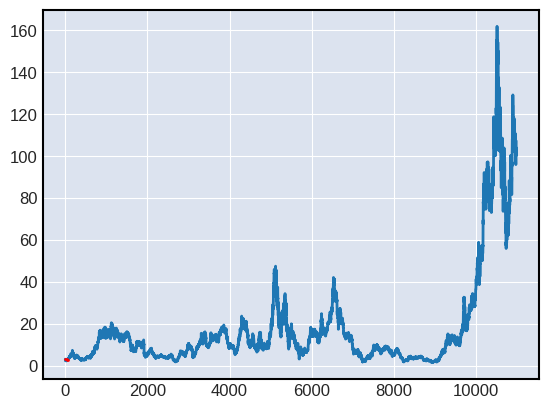

In [76]:
cup = df['Close'].iloc[0:50].max()
handle = df['Close'].iloc[50:60].min()

plt.plot(df['Close'])
plt.plot([0, 50], [cup, cup], 'r')
plt.plot([50, 60], [handle, handle], 'r')
plt.show()

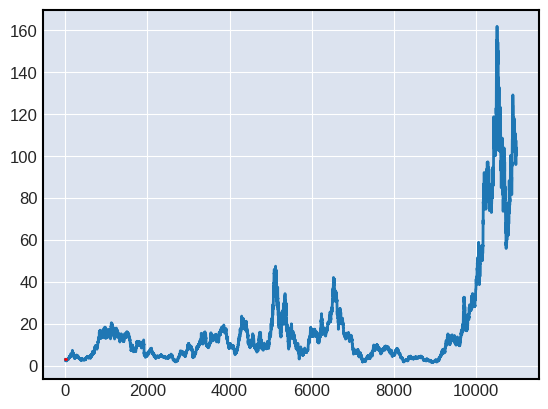

In [77]:
top1 = df['Close'].iloc[0:10].max()
top2 = df['Close'].iloc[10:20].max()

plt.plot(df['Close'])
plt.plot([0, 10], [top1, top1], 'r')
plt.plot([10, 20], [top2, top2], 'r')
plt.show()

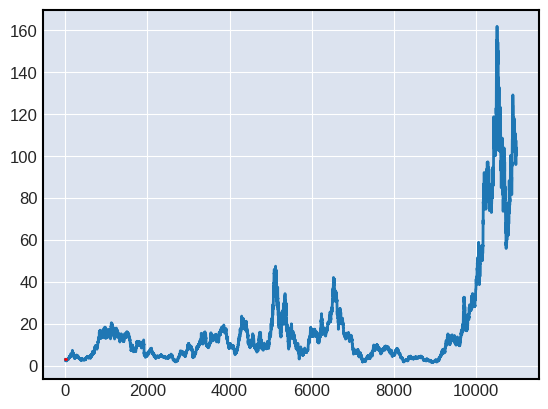

In [78]:
flagpole = df['Close'].iloc[0:10].max()
flag = df['Close'].iloc[10:20].min()

plt.plot(df['Close'])
plt.plot([0, 10], [flagpole, flagpole], 'r')
plt.plot([10, 20], [flag, flag], 'r')
plt.show()

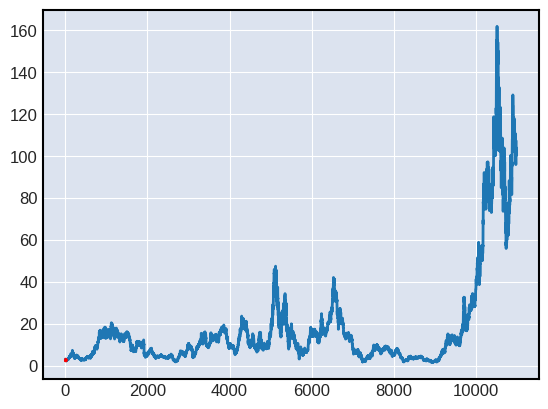

In [79]:
low1 = df['Close'].iloc[0:10].min()
low2 = df['Close'].iloc[10:20].min()
low3 = df['Close'].iloc[20:30].min()
high1 = df['Close'].iloc[0:10].max()
high2 = df['Close'].iloc[10:20].max()
high3 = df['Close'].iloc[20:30].max()

plt.plot(df['Close'])
plt.plot([0, 10], [low1, high1], 'r')
plt.plot([10, 20], [low2, high2], 'r')
plt.plot([20, 30], [low3, high3], 'r')
plt.show()